<h1>Project 2021 for the Machine Learning and Statistics (Scikit-Learn).<h1>








##  Description.


The purpose of this assessment is to ensure that you have achieved the learning outcomes
of the module while also providing you with sample work to show prospective
employers. The overall assessment is split into the three components as detailed below.
The percentages beside each bullet point indicate the weighting of that item in your
overall mark. Note, however, that the examiners’ overall impression of your submission
may override the individual weightings where deemed appropriate.
1. A clear and concise overview of the scikit-learn Python library.
2. Demonstrations of three interesting scikit-learn algorithms.
3. Appropriate plots and other visualisations to enhance your notebook for viewers.

##  Introductory remarks.
Machine learning can be interpreted as a field of science that enables computers to learn without the need for explicit programming. Scikit-Learn is a library that is designed for solving the analytical problem. The great advantage of scikit-Learn is that we can use them by learning about data science without having to do so first knowledge about it. The scikit-learn package comes with many matrix decomposition functions (https://scikit-learn.org/ stable / modules / classes.html - module-sklearn.decomposition), including the algorithm, among others principal component analysis (PCA algorithm). 


The scikit-Learn library is very accessible yet includes many efficient machine learning algorithms; for this reason, it is perfectly suited for people starting their adventure with machine learning. scikit-learn is perhaps the most popular Python package
designed for machine learning. It contains many models implemented in this project. 


<b> The structure of the Scikit-Learn module. </b>

Uniformity - all objects use a uniform, simple interface:
- Estimators (estimating functions). Any object capable of estimating certain parameters based on the data set it is called the estimator (e.g. imputer class is a function estimator). The estimation operation itself is performed by the fit () method, and its only the parameter is a dataset (or two datasets in the case of algorithms supervised learning; the second set contains labels). Any other influencing parameters on the course of the estimation operation are considered as hyperparameters (e.g. the strategy parameter of the imputer class) they must be designated as instance variables (generally in the form of a parameter constructor). 
- Transformers (transforming or transforming functions). Some estimators (like for example imputer class) are also able to transform the data set; they are called transformers. Again, their interface is not complicated: the transformation processb is performed;; with the transform () method, and its parameter is modified data set. As a result, the transformed dataset is returned. Operation transformation depends primarily on the learned parameters (as in the case of class imputer). All transformers also include a fit_transform () complex method, which is equivalent to calling fit () followed by transform () (sometimes this the complex method is optimized and works much faster than its components).
- Predictors (prognostic functions). Certain estimators are able to predict the results of na the basis of the data set; these are the so-called predictors. For example, the LinearRegression model from the previous chapter is a predictor: we used it to predict satisfaction life, knowing the value of GDP per capita of a given country. The prognostic function includes a method predict () that accepts new datasets and returns a set of associated predictions. In addition, there is also the score () method that measures the quality of forecasts on the basis of test set. 

Inspection - All hyperparameters of estimators are directly accessible via public
instance variables (e.g., imputer.strategy); also all learned parameters of the evaluation function are available through these types of variables marked with an underscore at the end (e.g. imputer.statistics_).
- Non-proliferation of classes. The datasets are not presented in a self-prepared form classes, but as NumPy or SciPy sparse matrices. In turn, the hyperparameters are standard Python strings or numeric values.
- Composition. Existing components are used as often as possible. For example,
it is easy to create a Pipeline estimator from a self-selected sequence of transform functions finished with the last estimation function, as we will see soon.
- Reasonable defaults. Scikit-Learn provides thoughtful defaults for most parameters, so we can easily create a basic working system.








## 1. Linear Regression.
I am using a linear regression as a first scikit-learn algorithm. I am demonstrating data and findings from my previous project (I was an author and developer) for the Fundamentals of Data Analysis Module, where I worked on linear regression. 


As always, I need to start by cleaning and organizing the data.
I have passive data collection - existed.

In [243]:
#importing relevant libraries 
import numpy as np #for mathematical operations
import pandas as pd #used for data manipulation
import matplotlib.pyplot as plt #used to plot my data
import seaborn as sns #for better visualization 

# Import the CSV file and create the DataFrames:
powerproduction = pd.read_csv("powerproduction.csv")

# becasue of Panda library the set can be transform to a table (showing 15records):

print(powerproduction.head(15))


    speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498
11  0.576  5.241
12  0.626  4.220
13  0.676  7.974
14  0.701  9.746


Explore the data - as the 2nd part of analysis. 


Statistical description can be based on the Python NumPy, which provides descriptive statistical calculation. For example, my code defines the mean of a dataset.

In [244]:
np.mean(powerproduction)

speed    12.590398
power    48.014584
dtype: float64

The Data visualization is another way to provide a sense of a data set. In this case I shall be able to present patterns, relationships and also outliers. The code below shows the speed. I am presenting that by a histogram to visualize the distribution of all the speeds and powers in my dataset.

C:\Users\adria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


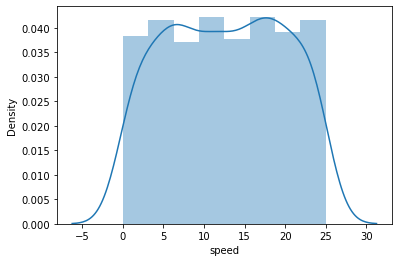

In [245]:
speed = powerproduction["speed"]
sns.distplot(speed)
 
plt.show() 

C:\Users\adria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


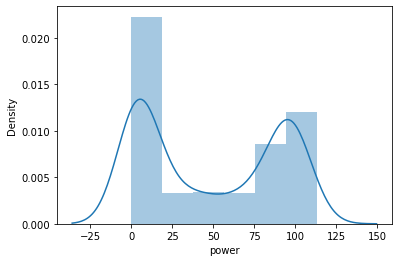

In [246]:
power = powerproduction["power"]
sns.distplot(power)
 
plt.show() 

Checking requirement for linear regression - in order to use the scikit-learn module.

To check if linear regression is appropriate for my data, I need to plot it and verify that it is in line with the linear trend. I do this with the following code:

Text(0, 0.5, 'Power')

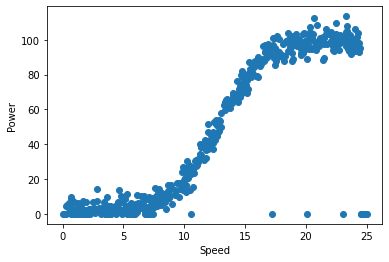

In [247]:
# Set x to my input speed
x = powerproduction["speed"]
# Set y to my output power, this is the value I trying to predict
y = powerproduction["power"]
# Plot Power against Speed
plt.scatter(x, y)
# Add labels to the graph
plt.xlabel('Speed')
plt.ylabel('Power')



The regression is in line with the linear trend.

Implementing a simple linear regression.

I am going to use a function which will make all mathematical calculation. In this state of affairs, I am going to use the function from the scikit-learn library. 


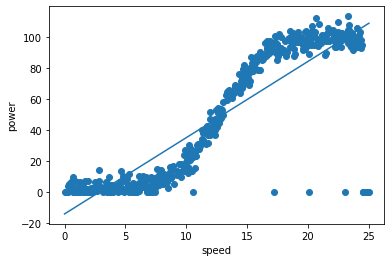

In [248]:
from sklearn.linear_model import LinearRegression
# I am setting x and y values to the appropriate variables, I do reshape x to turn it from a 1D array to a 2D array, ready to be used in my model.
x = powerproduction["speed"].values.reshape(-1,1)
y = powerproduction["power"]
# Defining the variable lr_model as my linear regression model
lr_model = LinearRegression()
# Fitting my linear regression model to my dataset, I am basically finding θ₀ and θ₁ in our regression line: ŷ = θ₀ + θ₁𝑥. Gradient descent and other methods are used for this.
lr_model.fit(x, y)
# Finding predicted values for all x values by applying ŷᵢ = θ₀ + θ₁𝑥ᵢ
y_pred = lr_model.predict(x)
plt.scatter(x, y)
plt.xlabel("speed")
plt.ylabel("power")
# Here we are plotting our regression line ŷ = θ₀ + θ₁𝑥
plt.plot(x, y_pred)

In [249]:
theta_0 = lr_model.intercept_
theta_1 = lr_model.coef_
theta_0, theta_1

(-13.899902630519634, array([4.91759567]))

Regression model and using it to forecast.

The purpose of calculating my regression line is primarily to use it for forecasting. In that case, if I got a new wind speed value, I can expect new value of the power. 
So, this will help me to accurately predict wind turbine power output from wind speed values. 
The example below illustrates above statement: 


In [250]:
# input 46-new wind speed value, into my regression model "np.array([58]).reshape(1, 1)" reshapes 58 into a 2D array. This is done as my model only accepts inputs of this form.
y_pred = lr_model.predict(np.array([46]).reshape(1, 1))
y_pred #which prints the value of the wind turbine power output below: 

array([212.30949798])

## 2. Decision trees.
Like support vector machines, decision trees are versatile machine learning algorithms, used for both classification and regression tasks, and even for multi-output operations. We use them to obtain powerful models that are capable of learning against complex data sets. Decision trees are also components of random forests, which are currently one of the best machine learning algorithms. 
I would like to present the concept of decision trees, by developing simple example.


In [253]:
import pandas as pd
diffrent = ['magazine', 'magazine', 'magazine', 'magazine', 'programme', 'magazine', 'programme', 'programme', 'magazine', 
         'magazine', 'programme', 'programme', 'programme', 'magazine', 'programme', 'programme', 'programme', 'magazine', 
         'magazine', 'programme']
drinks = ['whiskey', 'vodka', 'vodka', 'whiskey', 'vodka', 'vodka', 'whiskey', 'vodka', 'vodka', 'whiskey', 'whiskey', 
         'whiskey', 'vodka', 'vodka', 'whiskey', 'vodka', 'whiskey', 'whiskey', 'whiskey', 'vodka']
outside = ['arts', 'arts', 'stupis', 'stupis', 'arts', 'stupis', 'stupis', 'arts', 'stupis', 'stupis', 'stupis', 'arts', 'arts',
           'arts', 'stupis', 'stupis', 'arts', 'arts', 'arts', 'arts']
aftertime = ['Yeah', 'Nah', 'Yeah', 'Yeah', 'Nah', 'Yeah', 'Nah', 'Yeah', 'Nah', 'Yeah', 'Nah', 'Nah', 'Nah', 'Yeah', 'Nah', 
           'Nah', 'Yeah', 'Nah', 'Nah', 'Yeah']
subs = pd.DataFrame({"diffrent": diffrent, "drinks": drinks, "outside": outside, "aftertime":aftertime})

subs["diffrent"], diffrent_kody = pd.factorize(subs["diffrent"])
subs["drinks"], drinks_kody = pd.factorize(subs["drinks"])
subs["outside"], outside_kody = pd.factorize(subs["outside"])
subs["aftertime"], aftertime_kody = pd.factorize(subs["aftertime"])

X = subs.drop(["aftertime"], axis = 1)
y = subs["aftertime"]

from sklearn.tree import DecisionTreeClassifier
klasyfikator = DecisionTreeClassifier(criterion = "entropy")
klasyfikator.fit(X = X, y = y)



DecisionTreeClassifier(criterion='entropy')

For decision trees, entropy will be a measure of the mixing of the dependent trait. So it will tell us how unclean our collection is.

Now, I want to visualize the learned decision tree by first using the export_graphviz () method and /or DecisionTreeRegressor, to create a graph definition file: 

In [254]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

## 3. Decision trees.
Like support vector machines, decision trees are versatile machine learning algorithms, used for both classification and regression tasks, and even for multi-output operations. We use them to obtain powerful models that are capable of learning against complex data sets. Decision trees are also components of random forests, which are currently one of the best machine learning algorithms. 
I would like to present the concept of decision trees, by developing simple example.


# List of sources.

***

<b> 1) DOCUMENTS AND REPORTS.</b>

Datasets: 
<http://www.cs.toronto.edu/~delve/data/>

GitHub Inc., “GitHub,”
<https://github.com/>

GMIT, “Quality Assurance Framework,”
<https://www.gmit.ie/general/quality-assurance-framework>

Matplotlib: Python plotting documentation:
<https://matplotlib.org/>

NumPy Documentation:
<https://numpy.org/doc/stable/reference/random/>

NumPy v1.19 Manual:
<https://numpy.org/doc/stable/index.html>

NumPy in general:
<https://numpy.org/>

pandas documentation:
<https://pandas.pydata.org/docs/index.html>

scikit-learn documentation:
<https://scikit-learn.org/stable>

The Python Standard Library
<https://docs.python.org/3/library/index.html>

UCI Machine Learning Repository:
<http://archive.ics.uci.edu/ml/datasets/Iris>




***


<b> 2) ARTICLES, MONOGRAPHS, STUDIES.</b>

Encyclopaedia Britannica: 
<http://www.britannica.com/>

Galli S., Python Feature Engineering Cookbook,  Birmingham 2020. 

Grus J., Data science od podstaw. Analiza danych w Pythonie. Wydanie II, Warszawa 2019. 

McLoughlin I., “Fundamentals of Data Analysis - full course”
<https://learnonline.gmit.ie/course/view.php?id=1120>

McLoughlin I., “Using git for assessments”
<https://github.com/ianmcloughlin/using-git-for-assessments/>

McLoughlin I., “Jupyter Teaching Notebooks,”
<https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/fitting-lines.ipynb>

Schweppes J., How to Think Write and Cite – key skills for Irish Law, Dublin 2011.

Waugh S., Extending and benchmarking Cascade-Correlation, Tasmania 1995.

VanderPlas J., A Whirlwind Tour of Python, Dublin 2016.

VanderPlas J., Python Data Science Handbook: Essential Tools for Working with Data, Dublin 2016.


***


<b>INTERNET RESOURCES. </b>

<https://www.w3schools.com/python/numpy_random.asp>

<https://www.geeksforgeeks.org/numpy-random-rand-python/>

<https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html>

<https://www.markdownguide.org/getting-started/>

<https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed>

<https://github.com/>

<https://en.wikipedia.org/wiki/Triangular_distribution>

<https://gitter.im/GMIT-Python-Learners-2019/community>

<https://docs.python.org/3/tutorial/>

<https://leanpub.com/pyprog/read>

<https://www.codecademy.com/courses/data-visualization-python/lessons/matplotlib-i/exercises/introduction-matplotlib-i>

<http://www.cs.nott.ac.uk/~pszgmh/counting.pdf>

<https://simplemaps.com/data/us-cities>

<https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html>

<https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed#:~:text=Bullets%3A%20Use%20the%20dash%20sign,Numbered%20lists%3A%20Start%20with%201.>

<https://www.codecademy.com/paths/>

<https://www.codecademy.com/articles/how-to-use-jupyter-notebooks-py3>

<https://simplemaps.com/data/canada-cities>

<https://www.codecademy.com/learn/learn-python-3/modules/learn-python3-loops/cheatsheet>

<https://pymotw.com/2/collections/counter.html>

<https://www.tutorialspoint.com/python3/dictionary_get.htm>

<https://jupyter.readthedocs.io/en/latest/>

<https://ichi.pro/pl/prosta-regresja-liniowa-w-pythonie-275871775585618>

<https://stackoverflow.com/questions/3496518/using-a-dictionary-to-count-the-items-in-a-list>

<https://www.kdnuggets.com/2020/09/simpsons-paradox.html>



